In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from urllib import request
import gzip
import pickle

In [3]:
base_url = 'http://yann.lecun.com/exdb/mnist/'
filenames = [
    'train-images-idx3-ubyte.gz',
    'train-labels-idx1-ubyte.gz',
    't10k-images-idx3-ubyte.gz',
    't10k-labels-idx1-ubyte.gz',
]

for name in filenames:
    print("Downloading {} ...".format(name))
    request.urlretrieve(base_url + name, name)
    print("Done")


Done
Done
Done
Done


In [4]:
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
        
    print("converted {} to NumPy array".format(filename))
    return images

In [5]:
load_images(filenames[0])

converted train-images-idx3-ubyte.gz to NumPy array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
load_images(filenames[2])

converted t10k-images-idx3-ubyte.gz to NumPy array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
        
    print("converted {} to NumPy array".format(filename))
    return labels

In [8]:
load_labels(filenames[1])

converted train-labels-idx1-ubyte.gz to NumPy array


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
load_labels(filenames[3])

converted t10k-labels-idx1-ubyte.gz to NumPy array


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
mnist = {
    'train_images' : load_images(filenames[0]),
    'train_labels' : load_labels(filenames[1]),
    'test_images' : load_images(filenames[2]),
    'test_labels' : load_labels(filenames[3]),
}

converted train-images-idx3-ubyte.gz to NumPy array
converted train-labels-idx1-ubyte.gz to NumPy array
converted t10k-images-idx3-ubyte.gz to NumPy array
converted t10k-labels-idx1-ubyte.gz to NumPy array


In [11]:
mnist['train_images'].shape

(60000, 784)

In [12]:
pickle.dump(mnist, open("mnist.pkl", "wb"))

In [13]:
mnist = pickle.load(open("mnist.pkl", "rb"))

In [14]:
mnist

{'test_images': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test_labels': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 'train_images': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'train_labels': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)}

In [15]:
def print_train(index):
    plt.gray()
    plt.imshow(mnist['train_images'][index].reshape(28,28))
    plt.show()
    
    print("Digit: ", mnist['train_labels'][index])

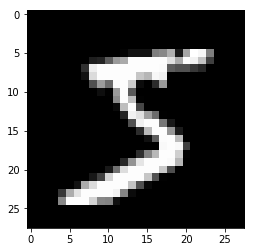

Digit:  5


In [16]:
print_train(0)

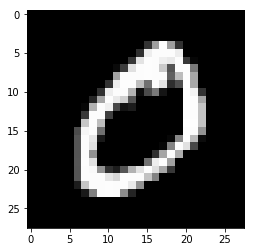

Digit:  0


In [17]:
print_train(1)

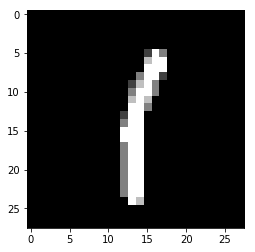

Digit:  1


In [18]:
print_train(54236)

In [19]:
def print_test(index):
    plt.gray()
    plt.imshow(mnist['test_images'][index].reshape(28,28))
    plt.show()
    
    print("Digit: ", mnist['test_labels'][index])

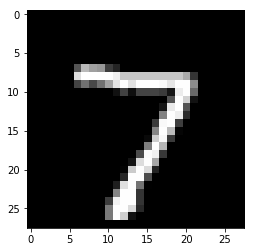

Digit:  7


In [20]:
print_test(0)

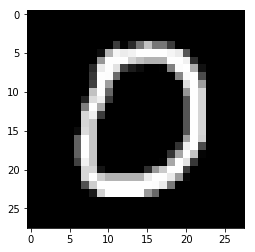

Digit:  0


In [21]:
print_test(10)